In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 16.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS116.Python_ML/Project/Data (Customer)/data_preprocessing")
df

,Segmentation,Gender,Age,Graduated,Profession,Work_Experience,Family_Size,Var_1,Has_Kid,Age_Teen,Married_Spending
0,0.0,0.0,0.056338,0.0,0.000000,0.083333,0.500000,0.500000,0.0,1.0,0.0
1,3.0,1.0,0.281690,1.0,0.987538,0.083333,0.333333,0.500000,1.0,0.0,0.5
2,2.0,1.0,0.690141,1.0,0.987538,0.083333,0.000000,0.833333,0.0,0.0,0.0
3,2.0,0.0,0.690141,1.0,0.925542,0.000000,0.166667,0.833333,0.0,0.0,1.0
4,3.0,1.0,0.309859,1.0,1.000000,0.083333,0.833333,0.833333,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8063,0.0,0.0,0.056338,0.0,0.625918,0.000000,1.000000,0.000000,0.0,1.0,0.0
8064,0.0,0.0,0.239437,0.0,0.806878,0.250000,0.500000,0.500000,0.0,0.0,0.0
8065,0.0,1.0,0.211268,1.0,0.000000,0.083333,0.000000,0.833333,0.0,0.0,0.0
8066,2.0,1.0,0.126761,1.0,0.000000,0.083333,0.500000,0.833333,0.0,0.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier # Random Forest Classifier, Stacking Classifier
from sklearn.svm import SVC # Support Vector Machine
from sklearn.linear_model import LogisticRegression # Logistic Regression
from xgboost import XGBClassifier # XGBoost
from lightgbm import LGBMClassifier # LightGBM
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
import time
import joblib
import warnings
warnings.filterwarnings('ignore')

X = df.drop('Segmentation', axis=1)
y = df['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def evaluate_model_full(model, X_train, X_test, y_train, y_test):
    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Ghi thời gian bắt đầu huấn luyện
    start_fit = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - start_fit

    # Ghi thời gian bắt đầu dự đoán
    start_score = time.time()
    y_pred = model.predict(X_test)
    score_time = time.time() - start_score

    # Dự đoán
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Tính Acurracy
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    # Tính F1 macro
    f1_macro_train = f1_score(y_train, y_pred_train, average='macro')
    f1_macro_test = f1_score(y_test, y_pred_test, average='macro')

    return {
        "fit_time": fit_time,
        "test_time": score_time,
        "f1_macro_train": f1_macro_train,
        "f1_macro_test": f1_macro_test,
        "accuracy_train": accuracy_train,
        "accuracy_test": accuracy_test
    }

In [ ]:
lgr = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')
lgr_score = evaluate_model_full(lgr, X_train, X_test, y_train, y_test)

rdf = RandomForestClassifier(n_estimators=100, random_state=42)
rdf_score = evaluate_model_full(rdf, X_train, X_test, y_train, y_test)

xgb = XGBClassifier(random_state=42)
xgb_score = evaluate_model_full(xgb, X_train, X_test, y_train, y_test)

lgbm = LGBMClassifier(random_state=42)
lgbm_score = evaluate_model_full(lgbm, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 114
[LightGBM] [Info] Number of data points in the train set: 6454, number of used features: 10
[LightGBM] [Info] Start training from score -1.269166
[LightGBM] [Info] Start training from score -1.409810
[LightGBM] [Info] Start training from score -1.468612
[LightGBM] [Info] Start training from score -1.408542
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 114
[LightGBM] [Info] Number of data points in the train set: 6454, number of used features: 10
[LightGBM] [Info] Start training from score -1.269166
[LightGBM] [Info] Start trai

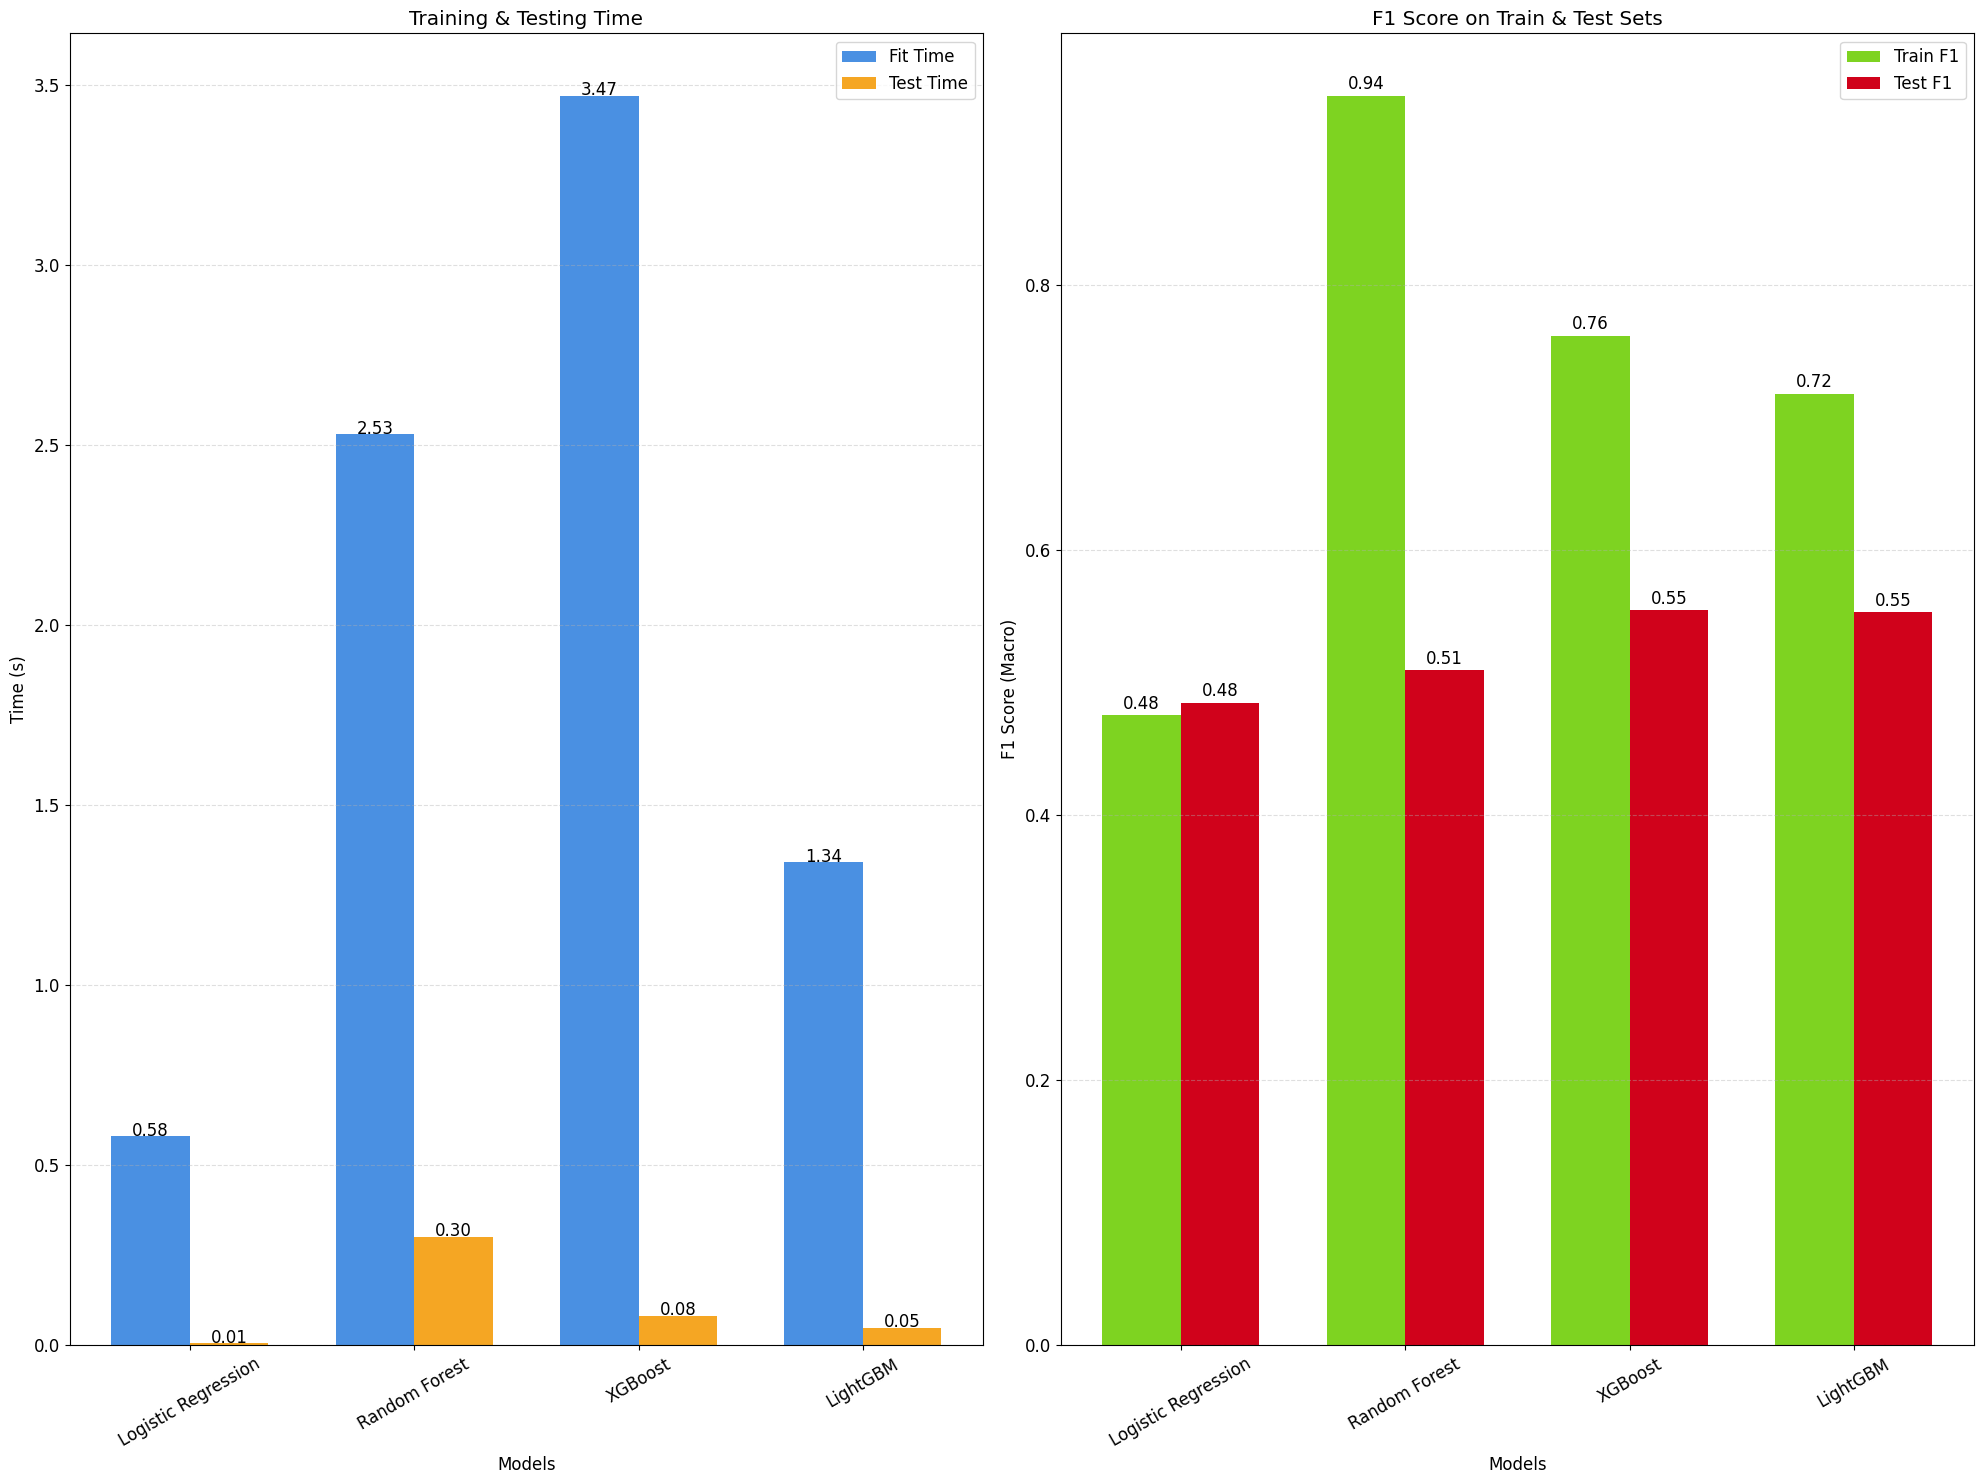

In [ ]:
score = [lgr_score, rdf_score, xgb_score, lgbm_score]
columns = ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM']

plt.figure(figsize=(20, 15))
plt.rcParams.update({'font.size': 12})
width = 0.35
x = np.arange(len(columns))

# Màu đậm cho trình chiếu
fit_color = '#4A90E2'   # xanh dương đậm
test_color = '#F5A623'  # cam vàng đậm
train_color = '#7ED321' # xanh lá đậm
val_color = '#D0021B'   # đỏ đậm

# Biểu đồ thời gian
plt.subplot(1, 2, 1)
fit_time = [s['fit_time'] for s in score]
test_time = [s['test_time'] for s in score]
plt.bar(x - width/2, fit_time, width, label='Fit Time', color=fit_color)
plt.bar(x + width/2, test_time, width, label='Test Time', color=test_color)
for i in range(len(score)):
    plt.text(i - width/2, fit_time[i] + 0.002, f"{fit_time[i]:.2f}", ha='center')
    plt.text(i + width/2, test_time[i] + 0.002, f"{test_time[i]:.2f}", ha='center')
plt.xlabel('Models')
plt.ylabel('Time (s)')
plt.title('Training & Testing Time')
plt.xticks(x, columns, rotation=30)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Biểu đồ F1 score
plt.subplot(1, 2, 2)
f1_train = [s['f1_macro_train'] for s in score]
f1_test = [s['f1_macro_test'] for s in score]
plt.bar(x - width/2, f1_train, width, label='Train F1', color=train_color)
plt.bar(x + width/2, f1_test, width, label='Test F1', color=val_color)
for i in range(len(score)):
    plt.text(i - width/2, f1_train[i] + 0.005, f"{f1_train[i]:.2f}", ha='center')
    plt.text(i + width/2, f1_test[i] + 0.005, f"{f1_test[i]:.2f}", ha='center')
plt.xlabel('Models')
plt.ylabel('F1 Score (Macro)')
plt.title('F1 Score on Train & Test Sets')
plt.xticks(x, columns, rotation=30)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
def search_param_grid(model, param_grid, X_train, y_train, cv, grid):
    cv = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    if grid:
      grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
    else:
      grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_}")
    return grid_search

In [ ]:
lgr = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')
param = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.0, 0.5, 1.0, 2.0]
}
lgr_best = search_param_grid(lgr, param, X_train, y_train, 5, True)
results_lgr = pd.DataFrame(lgr_best.cv_results_).reset_index()

Best parameters: {'C': 0.5, 'penalty': 'l2'}
Best score: 0.46886337445208265


In [ ]:
rdf = RandomForestClassifier(random_state=42)
param = {
    'n_estimators': [100, 200, 300, 400],  # Số lượng cây trong rừng
    'max_depth': [10, 20, 30, None],  # Độ sâu tối đa của mỗi cây
    'min_samples_split': [2, 5, 10],  # Số mẫu tối thiểu để chia một nút
    'min_samples_leaf': [1, 2, 4],  # Số mẫu tối thiểu tại mỗi lá
    'max_features': ['sqrt', 'log2'],  # Số lượng đặc trưng chọn khi chia
    'bootstrap': [True, False],
}
rdf_best = search_param_grid(rdf, param, X_train, y_train, 5, False)
results_rdf = pd.DataFrame(rdf_best.cv_results_).reset_index()

Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Best score: 0.5509394288158831


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

def optuna_tune_model(model_type, X_train, y_train, n_trials=50, cv=5):
    def objective(trial):
        if model_type == 'xgboost':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 500),
                'max_depth': trial.suggest_int('max_depth', 3, 12),
                'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
                'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
                'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
                'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
                'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
                'eval_metric': 'mlogloss'
            }
            model = XGBClassifier(**params)

        elif model_type == 'lightgbm':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 500),
                'max_depth': trial.suggest_int('max_depth', 3, 12),
                'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
                'num_leaves': trial.suggest_int('num_leaves', 16, 256),
                'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
                'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
                'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
                'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
                'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0)
            }
            model = LGBMClassifier(**params)


        else:
            raise ValueError("model_type must be 'xgboost' or 'lightgbm'")

        score = cross_val_score(model, X_train, y_train,
                                scoring=make_scorer(f1_score, average='macro'),
                                cv=cv, n_jobs=-1)
        return score.mean()

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)

    print(f"Best params for {model_type}: {study.best_params}")
    return study.best_params


In [ ]:
xgb_best_params = optuna_tune_model('xgboost', X_train, y_train, n_trials=300, cv=5)

[I 2025-05-31 00:18:01,376] A new study created in memory with name: no-name-0828329a-6f93-40ea-8536-47881deac250
[I 2025-05-31 00:18:06,602] Trial 0 finished with value: 0.5512391318602216 and parameters: {'n_estimators': 188, 'max_depth': 8, 'learning_rate': 0.07438371496144913, 'subsample': 0.5849691073535194, 'colsample_bytree': 0.757286605835958, 'gamma': 0.001103299610533437, 'min_child_weight': 4}. Best is trial 0 with value: 0.5512391318602216.
[I 2025-05-31 00:18:08,775] Trial 1 finished with value: 0.5552877219551278 and parameters: {'n_estimators': 132, 'max_depth': 7, 'learning_rate': 0.01096027551577366, 'subsample': 0.5981057524324221, 'colsample_bytree': 0.8995575355841015, 'gamma': 6.1104479975363424e-06, 'min_child_weight': 6}. Best is trial 1 with value: 0.5552877219551278.
[I 2025-05-31 00:18:12,302] Trial 2 finished with value: 0.5628962528376794 and parameters: {'n_estimators': 201, 'max_depth': 11, 'learning_rate': 0.01909356962543338, 'subsample': 0.7027134240067

Best params for xgboost: {'n_estimators': 185, 'max_depth': 6, 'learning_rate': 0.04874552533555585, 'subsample': 0.63210298743491, 'colsample_bytree': 0.699357677308716, 'gamma': 0.0019397100077596016, 'min_child_weight': 2}


In [ ]:
lightgbm_best_params = optuna_tune_model('lightgbm', X_train, y_train, n_trials=300, cv=5)

[I 2025-05-31 08:20:22,196] A new study created in memory with name: no-name-f08b3811-1c15-49fe-a753-bfefe7d72c15
[I 2025-05-31 08:20:31,326] Trial 0 finished with value: 0.5488818730252077 and parameters: {'n_estimators': 146, 'max_depth': 7, 'learning_rate': 0.033983326051198165, 'num_leaves': 231, 'min_child_samples': 22, 'subsample': 0.6462305615868551, 'colsample_bytree': 0.7526850568660965, 'reg_alpha': 1.4900999661817152e-07, 'reg_lambda': 1.0276054698971334e-08}. Best is trial 0 with value: 0.5488818730252077.
[I 2025-05-31 08:20:46,341] Trial 1 finished with value: 0.5513570814649071 and parameters: {'n_estimators': 470, 'max_depth': 5, 'learning_rate': 0.015337616257602065, 'num_leaves': 30, 'min_child_samples': 27, 'subsample': 0.6228947330245336, 'colsample_bytree': 0.7479560485968746, 'reg_alpha': 0.00026947429886188865, 'reg_lambda': 5.9023704467650244e-05}. Best is trial 1 with value: 0.5513570814649071.
[I 2025-05-31 08:20:54,494] Trial 2 finished with value: 0.55499085

Best params for lightgbm: {'n_estimators': 277, 'max_depth': 7, 'learning_rate': 0.01901442382922003, 'num_leaves': 98, 'min_child_samples': 42, 'subsample': 0.7059970372751241, 'colsample_bytree': 0.6727658307638907, 'reg_alpha': 1.5749954210443506, 'reg_lambda': 0.000610959243703989}


In [ ]:
lgr_best.best_estimator_.fit(X_train, y_train)
rdf_best.best_estimator_.fit(X_train, y_train)

xgb_best = XGBClassifier(**xgb_best_params)
xgb_best.fit(X_train, y_train)

lightgbm_best_params['verbosity'] = -1
lgbm_best = LGBMClassifier(**lightgbm_best_params)
lgbm_best.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.6727658307638907,
               learning_rate=0.01901442382922003, max_depth=7,
               min_child_samples=42, n_estimators=277, num_leaves=98,
               reg_alpha=1.5749954210443506, reg_lambda=0.000610959243703989,
               subsample=0.7059970372751241, verbosity=-1)

In [ ]:
joblib.dump(lgr_best.best_estimator_, "/content/drive/MyDrive/CS116.Python_ML/Project/Model/lgr_best.pkl")
joblib.dump(rdf_best.best_estimator_, "/content/drive/MyDrive/CS116.Python_ML/Project/Model/rdf_best.pkl")
joblib.dump(xgb_best, "/content/drive/MyDrive/CS116.Python_ML/Project/Model/xgb_best.pkl")
joblib.dump(lgbm_best, "/content/drive/MyDrive/CS116.Python_ML/Project/Model/lgbm_best.pkl")

['/content/drive/MyDrive/CS116.Python_ML/Project/Model/lgbm_best.pkl']

In [ ]:
lgr_best = joblib.load("/content/drive/MyDrive/CS116.Python_ML/Project/Model/lgr_best.pkl")
rdf_best = joblib.load("/content/drive/MyDrive/CS116.Python_ML/Project/Model/rdf_best.pkl")
xgb_best = joblib.load("/content/drive/MyDrive/CS116.Python_ML/Project/Model/xgb_best.pkl")
lgbm_best = joblib.load("/content/drive/MyDrive/CS116.Python_ML/Project/Model/lgbm_best.pkl")

lgr_best_score = evaluate_model_full(lgr_best, X_train, X_test, y_train, y_test)
rdf_best_score = evaluate_model_full(rdf_best, X_train, X_test, y_train, y_test)
xgb_best_score = evaluate_model_full(xgb_best, X_train, X_test, y_train, y_test)
lgbm_best_score = evaluate_model_full(lgbm_best, X_train, X_test, y_train, y_test)

<Figure size 2000x1500 with 0 Axes>

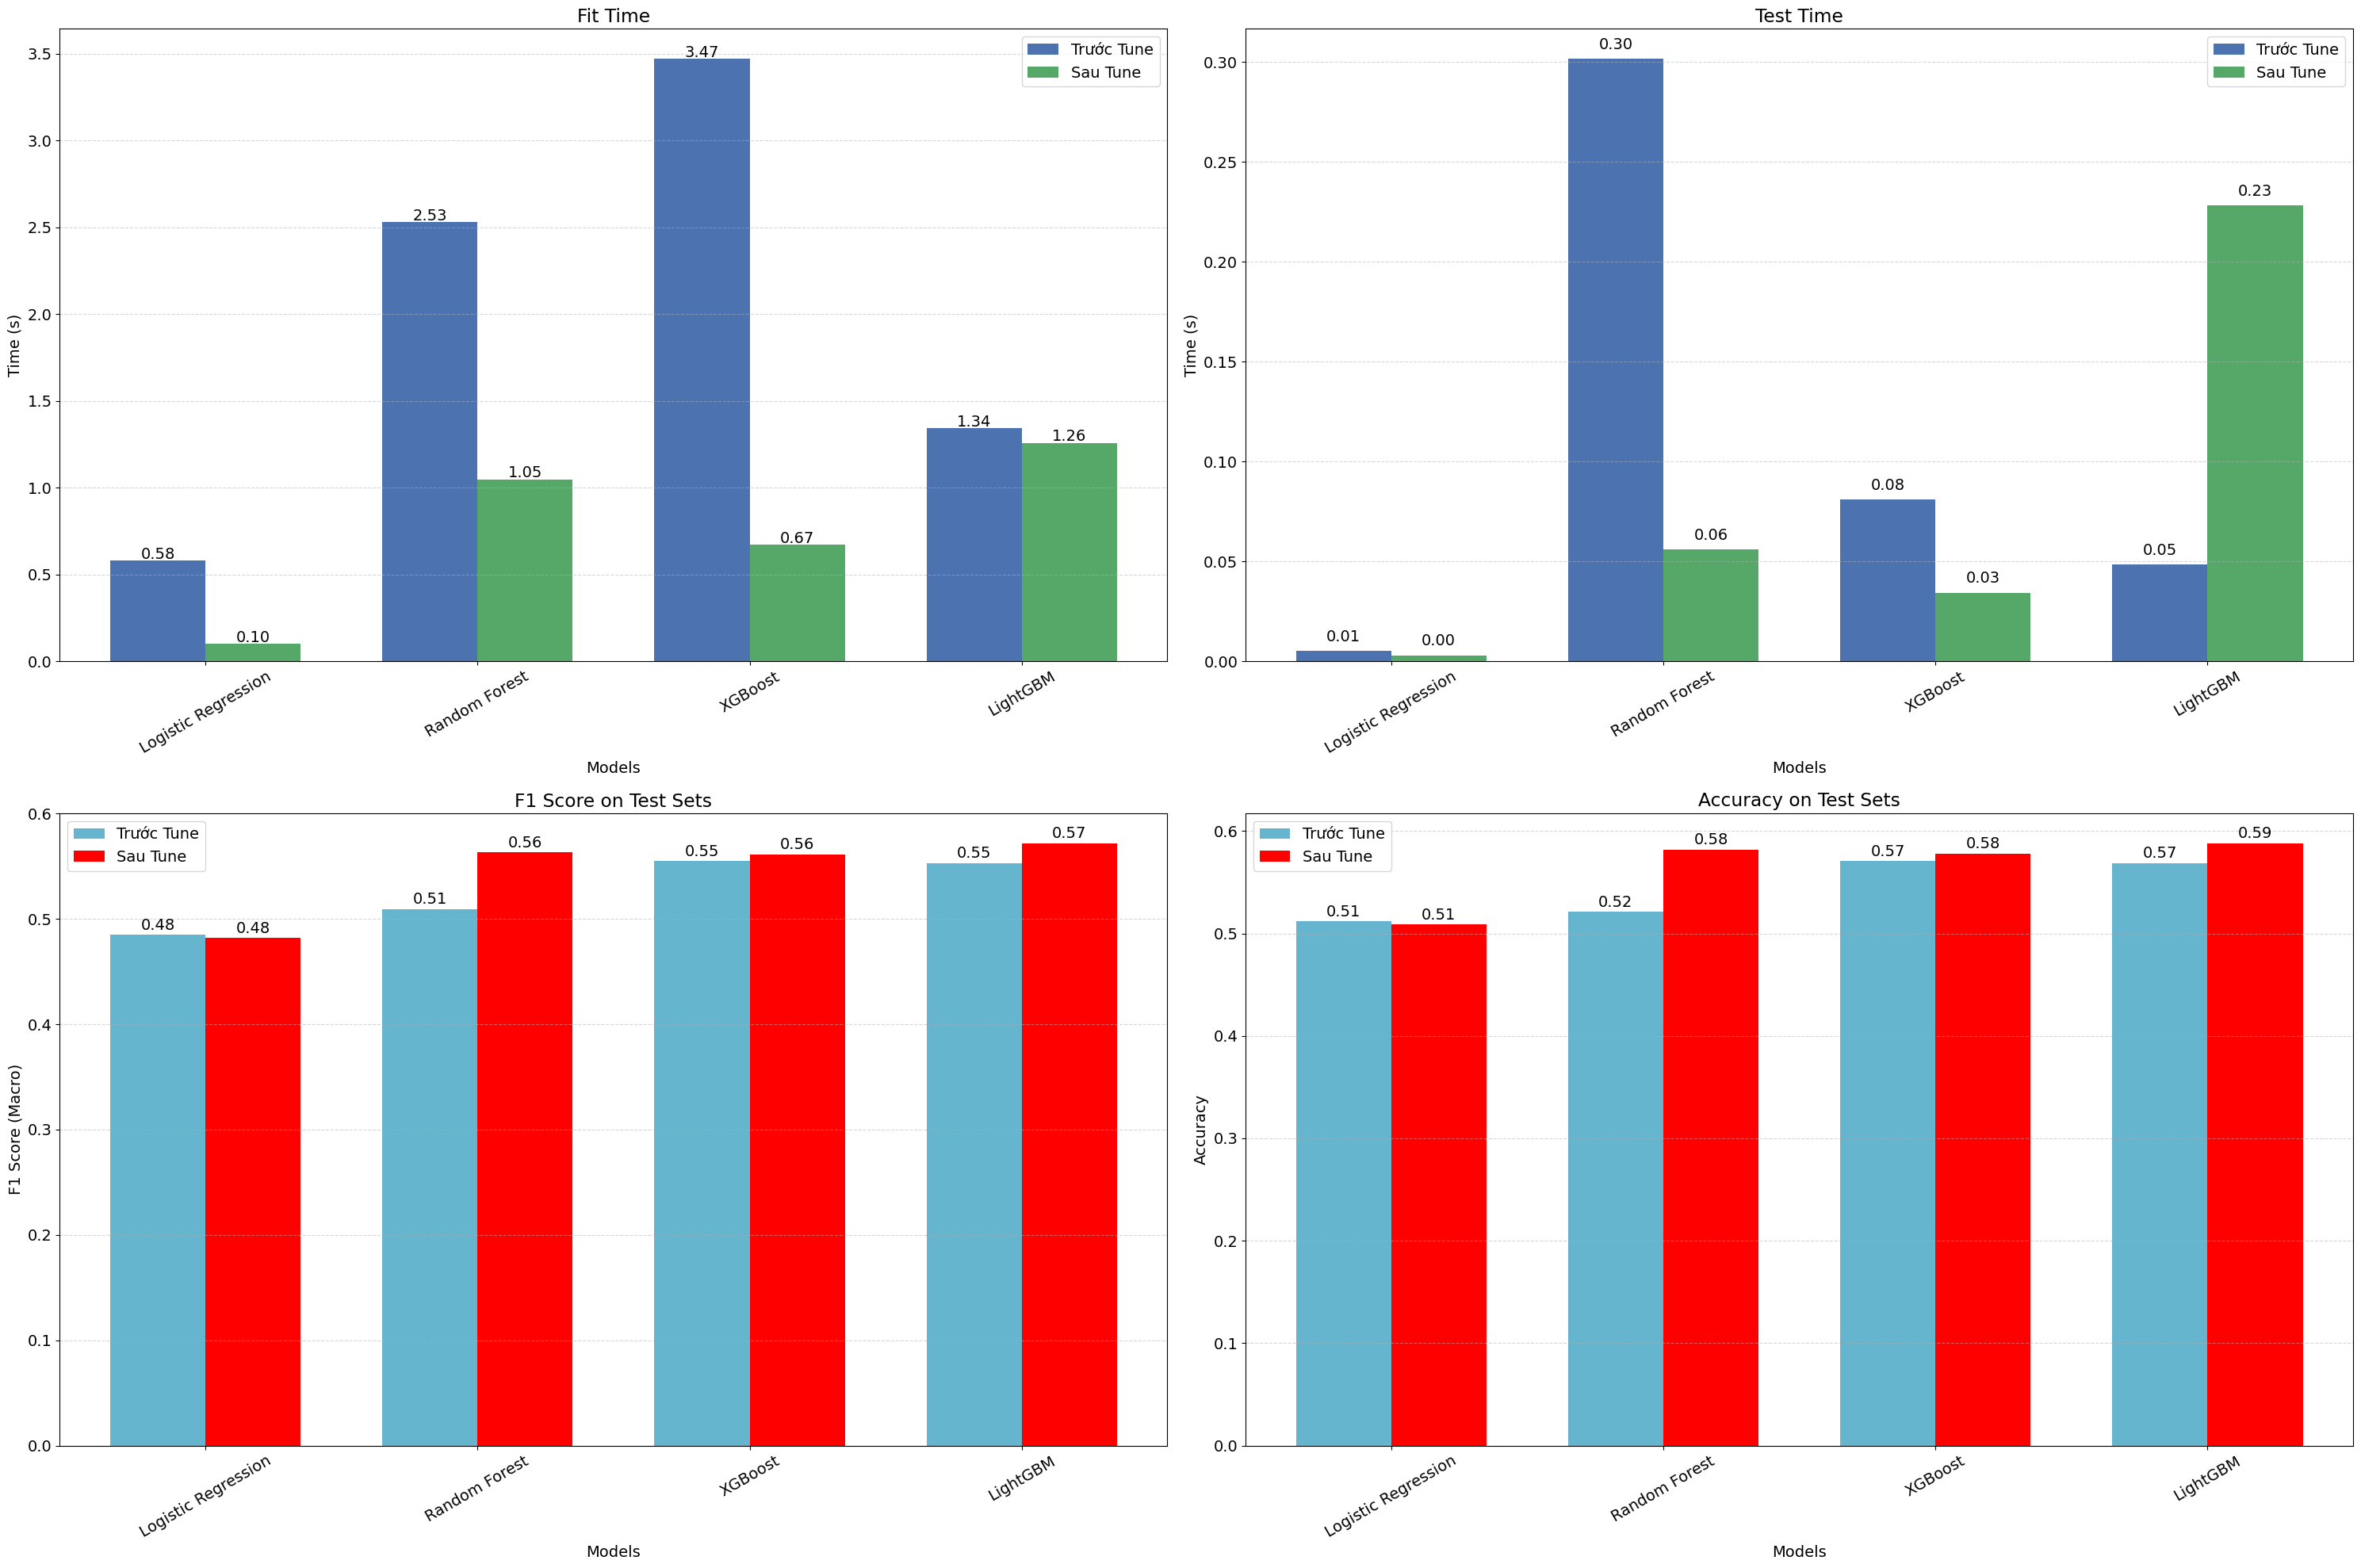

In [ ]:
score = [lgr_score, rdf_score, xgb_score, lgbm_score]
best_score = [lgr_best_score, rdf_best_score, xgb_best_score, lgbm_best_score]
columns = ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM']

plt.figure(figsize=(20, 15))
# Cỡ chữ
plt.rcParams.update({'font.size': 14})

# Tên mô hình
columns = ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM']
x = np.arange(len(columns))
width = 0.35

# Tám màu dễ phân biệt cho 4 biểu đồ (2 màu mỗi biểu đồ)
colors = [
    ('#4C72B0', '#55A868'),  # Biểu đồ 1
    ('#4C72B0', '#55A868'),  # Biểu đồ 2
    ('#64B5CD', 'red'),  # Biểu đồ 3
    ('#64B5CD', 'red')   # Biểu đồ 4
]

plt.figure(figsize=(30, 20))

# --- Fit Time ---
plt.subplot(2, 2, 1)
fit_before = [s['fit_time'] for s in score]
fit_after = [s['fit_time'] for s in best_score]
plt.bar(x - width/2, fit_before, width, label='Trước Tune', color=colors[0][0])
plt.bar(x + width/2, fit_after, width, label='Sau Tune', color=colors[0][1])
for i in range(len(x)):
    plt.text(i - width/2, fit_before[i] + 0.01, f"{fit_before[i]:.2f}", ha='center')
    plt.text(i + width/2, fit_after[i] + 0.01, f"{fit_after[i]:.2f}", ha='center')
plt.title('Fit Time')
plt.xlabel('Models')
plt.ylabel('Time (s)')
plt.xticks(x, columns, rotation=30)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# --- Test Time ---
plt.subplot(2, 2, 2)
test_before = [s['test_time'] for s in score]
test_after = [s['test_time'] for s in best_score]
plt.bar(x - width/2, test_before, width, label='Trước Tune', color=colors[1][0])
plt.bar(x + width/2, test_after, width, label='Sau Tune', color=colors[1][1])
for i in range(len(x)):
    plt.text(i - width/2, test_before[i] + 0.005, f"{test_before[i]:.2f}", ha='center')
    plt.text(i + width/2, test_after[i] + 0.005, f"{test_after[i]:.2f}", ha='center')
plt.title('Test Time')
plt.xlabel('Models')
plt.ylabel('Time (s)')
plt.xticks(x, columns, rotation=30)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# --- F1 Score ---
plt.subplot(2, 2, 3)
f1_before = [s['f1_macro_test'] for s in score]
f1_after = [s['f1_macro_test'] for s in best_score]
plt.bar(x - width/2, f1_before, width, label='Trước Tune', color=colors[2][0])
plt.bar(x + width/2, f1_after, width, label='Sau Tune', color=colors[2][1])
for i in range(len(x)):
    plt.text(i - width/2, f1_before[i] + 0.005, f"{f1_before[i]:.2f}", ha='center')
    plt.text(i + width/2, f1_after[i] + 0.005, f"{f1_after[i]:.2f}", ha='center')
plt.title('F1 Score on Test Sets')
plt.xlabel('Models')
plt.ylabel('F1 Score (Macro)')
plt.xticks(x, columns, rotation=30)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# --- Accuracy ---
plt.subplot(2, 2, 4)
acc_before = [s['accuracy_test'] for s in score]
acc_after = [s['accuracy_test'] for s in best_score]
plt.bar(x - width/2, acc_before, width, label='Trước Tune', color=colors[3][0])
plt.bar(x + width/2, acc_after, width, label='Sau Tune', color=colors[3][1])
for i in range(len(x)):
    plt.text(i - width/2, acc_before[i] + 0.005, f"{acc_before[i]:.2f}", ha='center')
    plt.text(i + width/2, acc_after[i] + 0.005, f"{acc_after[i]:.2f}", ha='center')
plt.title('Accuracy on Test Sets')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(x, columns, rotation=30)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [14]:
# ----- Base models -----
estimators = [
    ('rdf', rdf_best),
    ('lgbm', lgbm_best),
    ('xgb', xgb_best)
]

# ----- Meta model -----
meta_model =  LogisticRegression()

# ----- Stacking -----
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,
    cv=10,          # cross-validation
    passthrough=False,  # nếu True sẽ thêm X vào đầu vào của meta model
    n_jobs=-1
)
joblib.dump(stacking_clf, "/content/drive/MyDrive/CS116.Python_ML/Project/Model/stacking_model.pkl")

['/content/drive/MyDrive/CS116.Python_ML/Project/Model/stacking_model.pkl']

In [ ]:
ensemble_best_score = evaluate_model_full(stacking_clf, X_train, X_test, y_train, y_test)

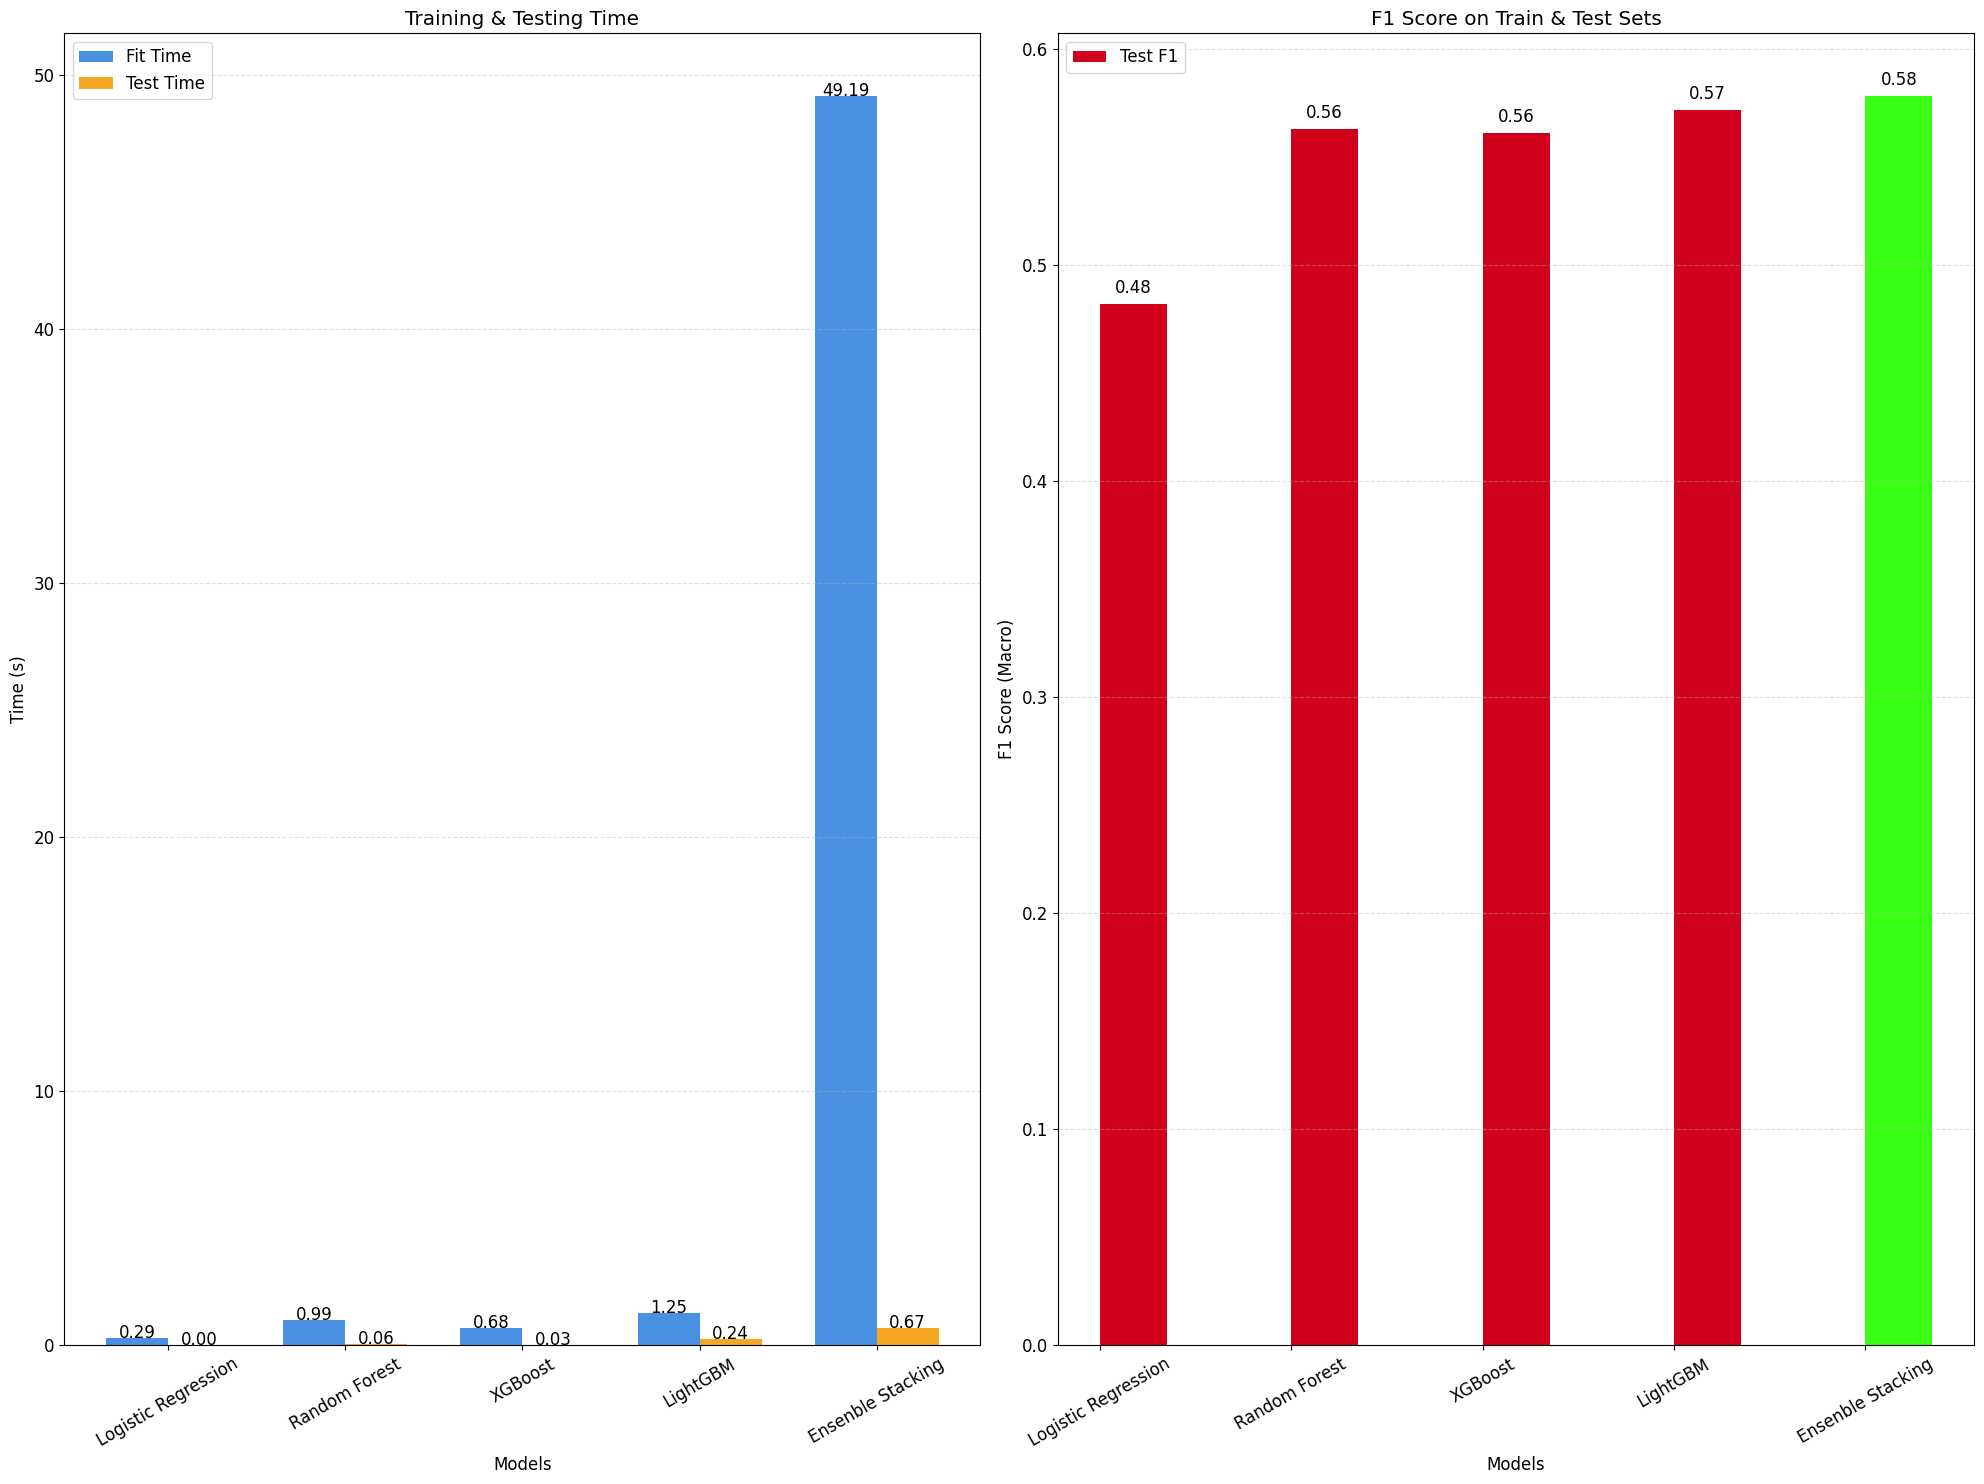

In [ ]:
score = [lgr_best_score, rdf_best_score, xgb_best_score, lgbm_best_score, ensemble_best_score]
columns = ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'Ensenble Stacking']

plt.figure(figsize=(20, 15))
plt.rcParams.update({'font.size': 12})
width = 0.35
x = np.arange(len(columns))

# Màu đậm cho trình chiếu
fit_color = '#4A90E2'   # xanh dương đậm
test_color = '#F5A623'  # cam vàng đậm
train_color = '#7ED321' # xanh lá đậm
val_color = '#D0021B'   # đỏ đậm

bar_color = ["#D0021B"]*(len(columns) - 1) + ["#39FF14"]

# Biểu đồ thời gian
plt.subplot(1, 2, 1)
fit_time = [s['fit_time'] for s in score]
test_time = [s['test_time'] for s in score]
plt.bar(x - width/2, fit_time, width, label='Fit Time', color=fit_color)
plt.bar(x + width/2, test_time, width, label='Test Time', color=test_color)
for i in range(len(score)):
    plt.text(i - width/2, fit_time[i] + 0.002, f"{fit_time[i]:.2f}", ha='center')
    plt.text(i + width/2, test_time[i] + 0.002, f"{test_time[i]:.2f}", ha='center')
plt.xlabel('Models')
plt.ylabel('Time (s)')
plt.title('Training & Testing Time')
plt.xticks(x, columns, rotation=30)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Biểu đồ F1 score
plt.subplot(1, 2, 2)
f1_test = [s['f1_macro_test'] for s in score]
plt.bar(x + width/2, f1_test, width, label='Test F1', color=bar_color)
for i in range(len(score)):
    plt.text(i + width/2, f1_test[i] + 0.005, f"{f1_test[i]:.2f}", ha='center')
plt.xlabel('Models')
plt.ylabel('F1 Score (Macro)')
plt.title('F1 Score on Train & Test Sets')
plt.xticks(x, columns, rotation=30)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()
